In [1]:
%matplotlib inline

# Import necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load the CSV file into a pandas DataFrame
Bornholm = pd.read_csv('../Data assignment 1/Bornholm 2022.csv', delimiter=',')

### Data exploration and selection of the windpark
Initial data exploration is used to check which wind park would be most suitable for further analysis. The most crucial variable is the Active Power Production. The windpark will be selected based on this variable, and if it has the least missing values.

In [3]:
# Check the dataframe
Bornholm.head()

,ts,kirkeby Sose Vindpark Reactive Power | aki_sov_reaktiveffekt | 804118,kirkeby Sose Vindpark Voltage | aki_sov_spending | 804121,Snorrebakken sterled Current | sno_ost_belastning | 804130,Snorrebakken sterled Active Power | sno_ost_effekt | 804131,Hasle Common 10kV Lines Voltage | has_fel_10kvskinnespend | 804133,Bornholm Vind Total Wind Production Active Power | var_vin_mwvindmoller | 804119,kirkeby Kalby Vindpark Active Power | aki_kav_effekt | 804120,Snorrebakken Transformer 10kV side Voltage | sno_t1s_10kvskinnespend | 804132,Hasle Vind Active Power | has_vin_effekt | 804123,kirkeby Kalby Vindpark Current | aki_kav_belastning | 804124,kirkeby Kalby Vindpark Voltage | aki_kav_spending | 804125,kirkeby Sose Vindpark Current | aki_sov_belastning | 804126,kirkeby Sose Vindpark Active Power | aki_sov_effekt | 804128,kirkeby Kalby Vindpark Reactive Power | aki_kav_reaktiveffekt | 804116,Hasle Vind Current | has_vin_belastning | 804117
0,2022-01-01 00:00:00,188.413086,10.661092,74.489578,1.345018,10.449781,15.931526,-1956.657227,10.637653,4.702763,89.519333,10.678671,93.949158,-1537.873047,60.541016,275.52356
1,2022-01-01 00:00:01,NaN,NaN,65.055702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:00:02,NaN,NaN,NaN,1.174675,NaN,NaN,NaN,NaN,4.887116,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:00:04,92.508789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.783592,NaN,NaN,NaN
4,2022-01-01 00:00:05,92.508789,NaN,65.055702,1.174675,NaN,15.748894,NaN,NaN,4.887116,NaN,NaN,76.783592,NaN,NaN,NaN


In [4]:
# Print the info for the dataframe
Bornholm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266687 entries, 0 to 9266686
Data columns (total 16 columns):
 #   Column                                                                            Dtype  
---  ------                                                                            -----  
 0   ts                                                                                object 
 1   kirkeby Sose Vindpark Reactive Power | aki_sov_reaktiveffekt | 804118             float64
 2   kirkeby Sose Vindpark Voltage | aki_sov_spending | 804121                         float64
 3   Snorrebakken sterled Current | sno_ost_belastning | 804130                        float64
 4   Snorrebakken sterled Active Power | sno_ost_effekt | 804131                       float64
 5   Hasle Common 10kV Lines Voltage | has_fel_10kvskinnespend | 804133                float64
 6   Bornholm Vind Total Wind Production Active Power | var_vin_mwvindmoller | 804119  float64
 7   kirkeby Kalby Vindpark Acti

In [5]:
Bornholm.columns

Index(['ts',
       'kirkeby Sose Vindpark Reactive Power | aki_sov_reaktiveffekt | 804118',
       'kirkeby Sose Vindpark Voltage | aki_sov_spending | 804121',
       'Snorrebakken sterled Current | sno_ost_belastning | 804130',
       'Snorrebakken sterled Active Power | sno_ost_effekt | 804131',
       'Hasle Common 10kV Lines Voltage | has_fel_10kvskinnespend | 804133',
       'Bornholm Vind Total Wind Production Active Power | var_vin_mwvindmoller | 804119',
       'kirkeby Kalby Vindpark Active Power | aki_kav_effekt | 804120',
       'Snorrebakken Transformer 10kV side Voltage | sno_t1s_10kvskinnespend | 804132',
       'Hasle Vind Active Power | has_vin_effekt | 804123',
       'kirkeby Kalby Vindpark Current | aki_kav_belastning | 804124',
       'kirkeby Kalby Vindpark Voltage | aki_kav_spending | 804125',
       'kirkeby Sose Vindpark Current | aki_sov_belastning | 804126',
       'kirkeby Sose Vindpark Active Power | aki_sov_effekt | 804128',
       'kirkeby Kalby Vindpark 

In [6]:
# Update the column names to keep only the part before the first '|'
Bornholm.columns = [col.split('|')[0].strip() for col in Bornholm.columns]

In [7]:
# Double check if the adjusting of the names was successful
Bornholm.columns

Index(['ts', 'kirkeby Sose Vindpark Reactive Power',
       'kirkeby Sose Vindpark Voltage', 'Snorrebakken sterled Current',
       'Snorrebakken sterled Active Power', 'Hasle Common 10kV Lines Voltage',
       'Bornholm Vind Total Wind Production Active Power',
       'kirkeby Kalby Vindpark Active Power',
       'Snorrebakken Transformer 10kV side Voltage', 'Hasle Vind Active Power',
       'kirkeby Kalby Vindpark Current', 'kirkeby Kalby Vindpark Voltage',
       'kirkeby Sose Vindpark Current', 'kirkeby Sose Vindpark Active Power',
       'kirkeby Kalby Vindpark Reactive Power', 'Hasle Vind Current'],
      dtype='object')

In [8]:
# To keep the dataframes easy to read, the names of the columns have to be adjusted
# For the wind farm names the acronyms will be used
name_update = {'ts': 'Timestamp',
    'kirkeby': 'AKI',
               'Snorrebakken': 'SNO',
               'Hassle Common': 'HAS com',
               'Hassle': 'HAS',
               'Bornholm Vind': '',
               'Vindpark ': ''
               }

In [9]:
# Ensures column names are properly interpreted as strings
Bornholm.columns = [col for col in Bornholm.columns]  
for word_to_replace, new_word in name_update.items():
# Check if the column contains the word and replace it
    Bornholm.columns = Bornholm.columns.str.replace(word_to_replace, new_word)

# Print the updated column names
print(Bornholm.columns)

Index(['Timestamp', 'AKI Sose Reactive Power', 'AKI Sose Voltage',
       'SNO sterled Current', 'SNO sterled Active Power',
       'Hasle Common 10kV Lines Voltage',
       ' Total Wind Production Active Power', 'AKI Kalby Active Power',
       'SNO Transformer 10kV side Voltage', 'Hasle Vind Active Power',
       'AKI Kalby Current', 'AKI Kalby Voltage', 'AKI Sose Current',
       'AKI Sose Active Power', 'AKI Kalby Reactive Power',
       'Hasle Vind Current'],
      dtype='object')


In [10]:
# Check if the data actually goes up to December 31st
Bornholm.tail(2)

,Timestamp,AKI Sose Reactive Power,AKI Sose Voltage,SNO sterled Current,SNO sterled Active Power,Hasle Common 10kV Lines Voltage,Total Wind Production Active Power,AKI Kalby Active Power,SNO Transformer 10kV side Voltage,Hasle Vind Active Power,AKI Kalby Current,AKI Kalby Voltage,AKI Sose Current,AKI Sose Active Power,AKI Kalby Reactive Power,Hasle Vind Current
9266685,2022-12-31 23:59:56,NaN,NaN,55.504623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9266686,2022-12-31 23:59:57,543.259766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Check the descriptive statistics of the data
Bornholm.describe()

,AKI Sose Reactive Power,AKI Sose Voltage,SNO sterled Current,SNO sterled Active Power,Hasle Common 10kV Lines Voltage,Total Wind Production Active Power,AKI Kalby Active Power,SNO Transformer 10kV side Voltage,Hasle Vind Active Power,AKI Kalby Current,AKI Kalby Voltage,AKI Sose Current,AKI Sose Active Power,AKI Kalby Reactive Power,Hasle Vind Current
count,416412.000000,181690.000000,2.588157e+06,3.677876e+06,277689.000000,1.716797e+06,1.099627e+06,292231.000000,3.507870e+06,1.054111e+06,181196.000000,1.033166e+06,1.013270e+06,174949.000000,1.702824e+06
mean,499.004897,10.609760,5.550434e+01,6.134277e-01,10.446309,9.568263e+00,-2.531431e+03,10.617992,2.430317e+00,1.383409e+02,10.622354,1.529026e+02,-2.703176e+03,168.706018,2.285743e+02
std,489.764982,0.124136,3.787315e+01,6.563272e-01,0.123724,7.981551e+00,1.605423e+03,0.107640,2.654236e+00,8.736252e+01,0.125095,9.437888e+01,1.686706e+03,146.472789,1.435940e+02
min,-201.599609,0.000000,0.000000e+00,0.000000e+00,0.000000,2.133040e-05,-6.291554e+03,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-7.570284e+03,-2292.324219,0.000000e+00
25%,89.311523,10.558550,2.285958e+01,7.483450e-02,10.405835,2.823947e+00,-3.721306e+03,10.564043,9.299003e-02,6.367870e+01,10.570269,7.050801e+01,-4.012216e+03,50.948242,1.037361e+02
50%,380.222656,10.611286,4.981353e+01,3.536300e-01,10.446852,7.428550e+00,-2.378639e+03,10.616779,1.363445e+00,1.297569e+02,10.620075,1.467379e+02,-2.608810e+03,137.263672,2.199530e+02
75%,821.384766,10.661092,8.286874e+01,9.982129e-01,10.487868,1.519063e+01,-1.163845e+03,10.672444,4.192172e+00,2.028490e+02,10.678671,2.255518e+02,-1.221388e+03,274.727539,3.449593e+02
max,3724.101562,11.800775,1.987414e+02,3.415281e+00,10.845302,2.999995e+01,2.171846e+02,11.009369,9.326673e+00,3.453416e+02,11.138645,4.844888e+02,7.318730e+02,1214.594727,5.413569e+02


In [13]:
# Make sure each column has the right datatype
Bornholm.dtypes

Timestamp                               object
AKI Sose Reactive Power                float64
AKI Sose Voltage                       float64
SNO sterled Current                    float64
SNO sterled Active Power               float64
Hasle Common 10kV Lines Voltage        float64
 Total Wind Production Active Power    float64
AKI Kalby Active Power                 float64
SNO Transformer 10kV side Voltage      float64
Hasle Vind Active Power                float64
AKI Kalby Current                      float64
AKI Kalby Voltage                      float64
AKI Sose Current                       float64
AKI Sose Active Power                  float64
AKI Kalby Reactive Power               float64
Hasle Vind Current                     float64
dtype: object

In [14]:
# Check for duplicates. If any, these have to be removed
Bornholm.duplicated().sum()

0

In [15]:
# The timestamp column is currently still seen as object datatype. It needs to be changed to datetime
graph_df = Bornholm.copy()
graph_df['datetime'] = pd.to_datetime(graph_df['Timestamp'])

In [16]:
graph_df

,Timestamp,AKI Sose Reactive Power,AKI Sose Voltage,SNO sterled Current,SNO sterled Active Power,Hasle Common 10kV Lines Voltage,Total Wind Production Active Power,AKI Kalby Active Power,SNO Transformer 10kV side Voltage,Hasle Vind Active Power,AKI Kalby Current,AKI Kalby Voltage,AKI Sose Current,AKI Sose Active Power,AKI Kalby Reactive Power,Hasle Vind Current,datetime
0,2022-01-01 00:00:00,188.413086,10.661092,74.489578,1.345018,10.449781,15.931526,-1956.657227,10.637653,4.702763,89.519333,10.678671,93.949158,-1537.873047,60.541016,275.52356,2022-01-01 00:00:00
1,2022-01-01 00:00:01,NaN,NaN,65.055702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01 00:00:01
2,2022-01-01 00:00:02,NaN,NaN,NaN,1.174675,NaN,NaN,NaN,NaN,4.887116,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01 00:00:02
3,2022-01-01 00:00:04,92.508789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.783592,NaN,NaN,NaN,2022-01-01 00:00:04
4,2022-01-01 00:00:05,92.508789,NaN,65.055702,1.174675,NaN,15.748894,NaN,NaN,4.887116,NaN,NaN,76.783592,NaN,NaN,NaN,2022-01-01 00:00:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266682,2022-12-31 23:59:51,NaN,NaN,NaN,NaN,NaN,NaN,-4530.102539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-31 23:59:51
9266683,2022-12-31 23:59:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3350.473633,NaN,NaN,2022-12-31 23:59:53
9266684,2022-12-31 23:59:55,NaN,NaN,NaN,1.177981,NaN,NaN,-4530.102539,NaN,0.074791,NaN,NaN,NaN,-3350.473633,NaN,NaN,2022-12-31 23:59:55
9266685,2022-12-31 23:59:56,NaN,NaN,55.504623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-31 23:59:56


In [17]:
copy = Bornholm.copy()
# Create separate dataframes of the two interesting wind parks so their information can be checked
Sose_df =copy.loc[:,['Timestamp', 'AKI Sose Active Power','AKI Sose Reactive Power','AKI Sose Voltage','AKI Sose Current', ' Total Wind Production Active Power', 'AKI Kalby Reactive Power']]
Kalby_df =copy.loc[:,['Timestamp', 'AKI Kalby Active Power','AKI Kalby Reactive Power','AKI Kalby Voltage','AKI Kalby Current', ' Total Wind Production Active Power']]

In [18]:
# Check for missing values in each column of the Sose_df DataFrame
Sose_df.isna().sum()

Timestamp                                    0
AKI Sose Active Power                  8253417
AKI Sose Reactive Power                8850275
AKI Sose Voltage                       9084997
AKI Sose Current                       8233521
 Total Wind Production Active Power    7549890
AKI Kalby Reactive Power               9091738
dtype: int64

In [19]:
# Check for missing values in each column of the Kalby_df DataFrame
Kalby_df.isna().sum()

Timestamp                                    0
AKI Kalby Active Power                 8167060
AKI Kalby Reactive Power               9091738
AKI Kalby Voltage                      9085491
AKI Kalby Current                      8212576
 Total Wind Production Active Power    7549890
dtype: int64

In [20]:
# Kalby has less missing values for active power, so that is the one we're using
Kalby_df.head(10)

,Timestamp,AKI Kalby Active Power,AKI Kalby Reactive Power,AKI Kalby Voltage,AKI Kalby Current,Total Wind Production Active Power
0,2022-01-01 00:00:00,-1956.657227,60.541016,10.678671,89.519333,15.931526
1,2022-01-01 00:00:01,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:00:02,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:00:04,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:00:05,NaN,NaN,NaN,NaN,15.748894
5,2022-01-01 00:00:06,NaN,NaN,NaN,NaN,NaN
6,2022-01-01 00:00:08,NaN,NaN,NaN,NaN,NaN
7,2022-01-01 00:00:10,NaN,NaN,NaN,NaN,NaN
8,2022-01-01 00:00:11,NaN,NaN,NaN,NaN,NaN
9,2022-01-01 00:00:12,NaN,NaN,NaN,NaN,NaN


### Data preperation Kalby windpark
The choice was made to contiue with the Kalby windpark. Next steps are a more detailed data exploration, resolving any missing values, and transforming the data to the right format for the model. 

In [21]:
# Convert the 'Timestamp' column to a datetime object and create a new 'datetime' column in the DataFrame.
Kalby_df['datetime'] = pd.to_datetime(Kalby_df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
# Set the 'datetime' column as the index of the DataFrame. 
Kalby_df.set_index('datetime', inplace=True)
Kalby_df.drop('Timestamp', axis=1, inplace=True)
# Check if the conversion and index setting were successful.
Kalby_df.head(10)

,AKI Kalby Active Power,AKI Kalby Reactive Power,AKI Kalby Voltage,AKI Kalby Current,Total Wind Production Active Power
datetime,,,,,
2022-01-01 00:00:00,-1956.657227,60.541016,10.678671,89.519333,15.931526
2022-01-01 00:00:01,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:00:02,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:00:04,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:00:05,NaN,NaN,NaN,NaN,15.748894
2022-01-01 00:00:06,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:00:08,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:00:10,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:00:11,NaN,NaN,NaN,NaN,NaN


In [22]:
# Sum the data per hour, so it matches the other datasets 
# only select active power since that is the target variable
aggregated_Kalby = pd.DataFrame({
    'AKI Kalby Active Power': Kalby_df['AKI Kalby Active Power'].resample('H').mean()})

In [23]:
aggregated_Kalby.isna().sum()

AKI Kalby Active Power    947
dtype: int64

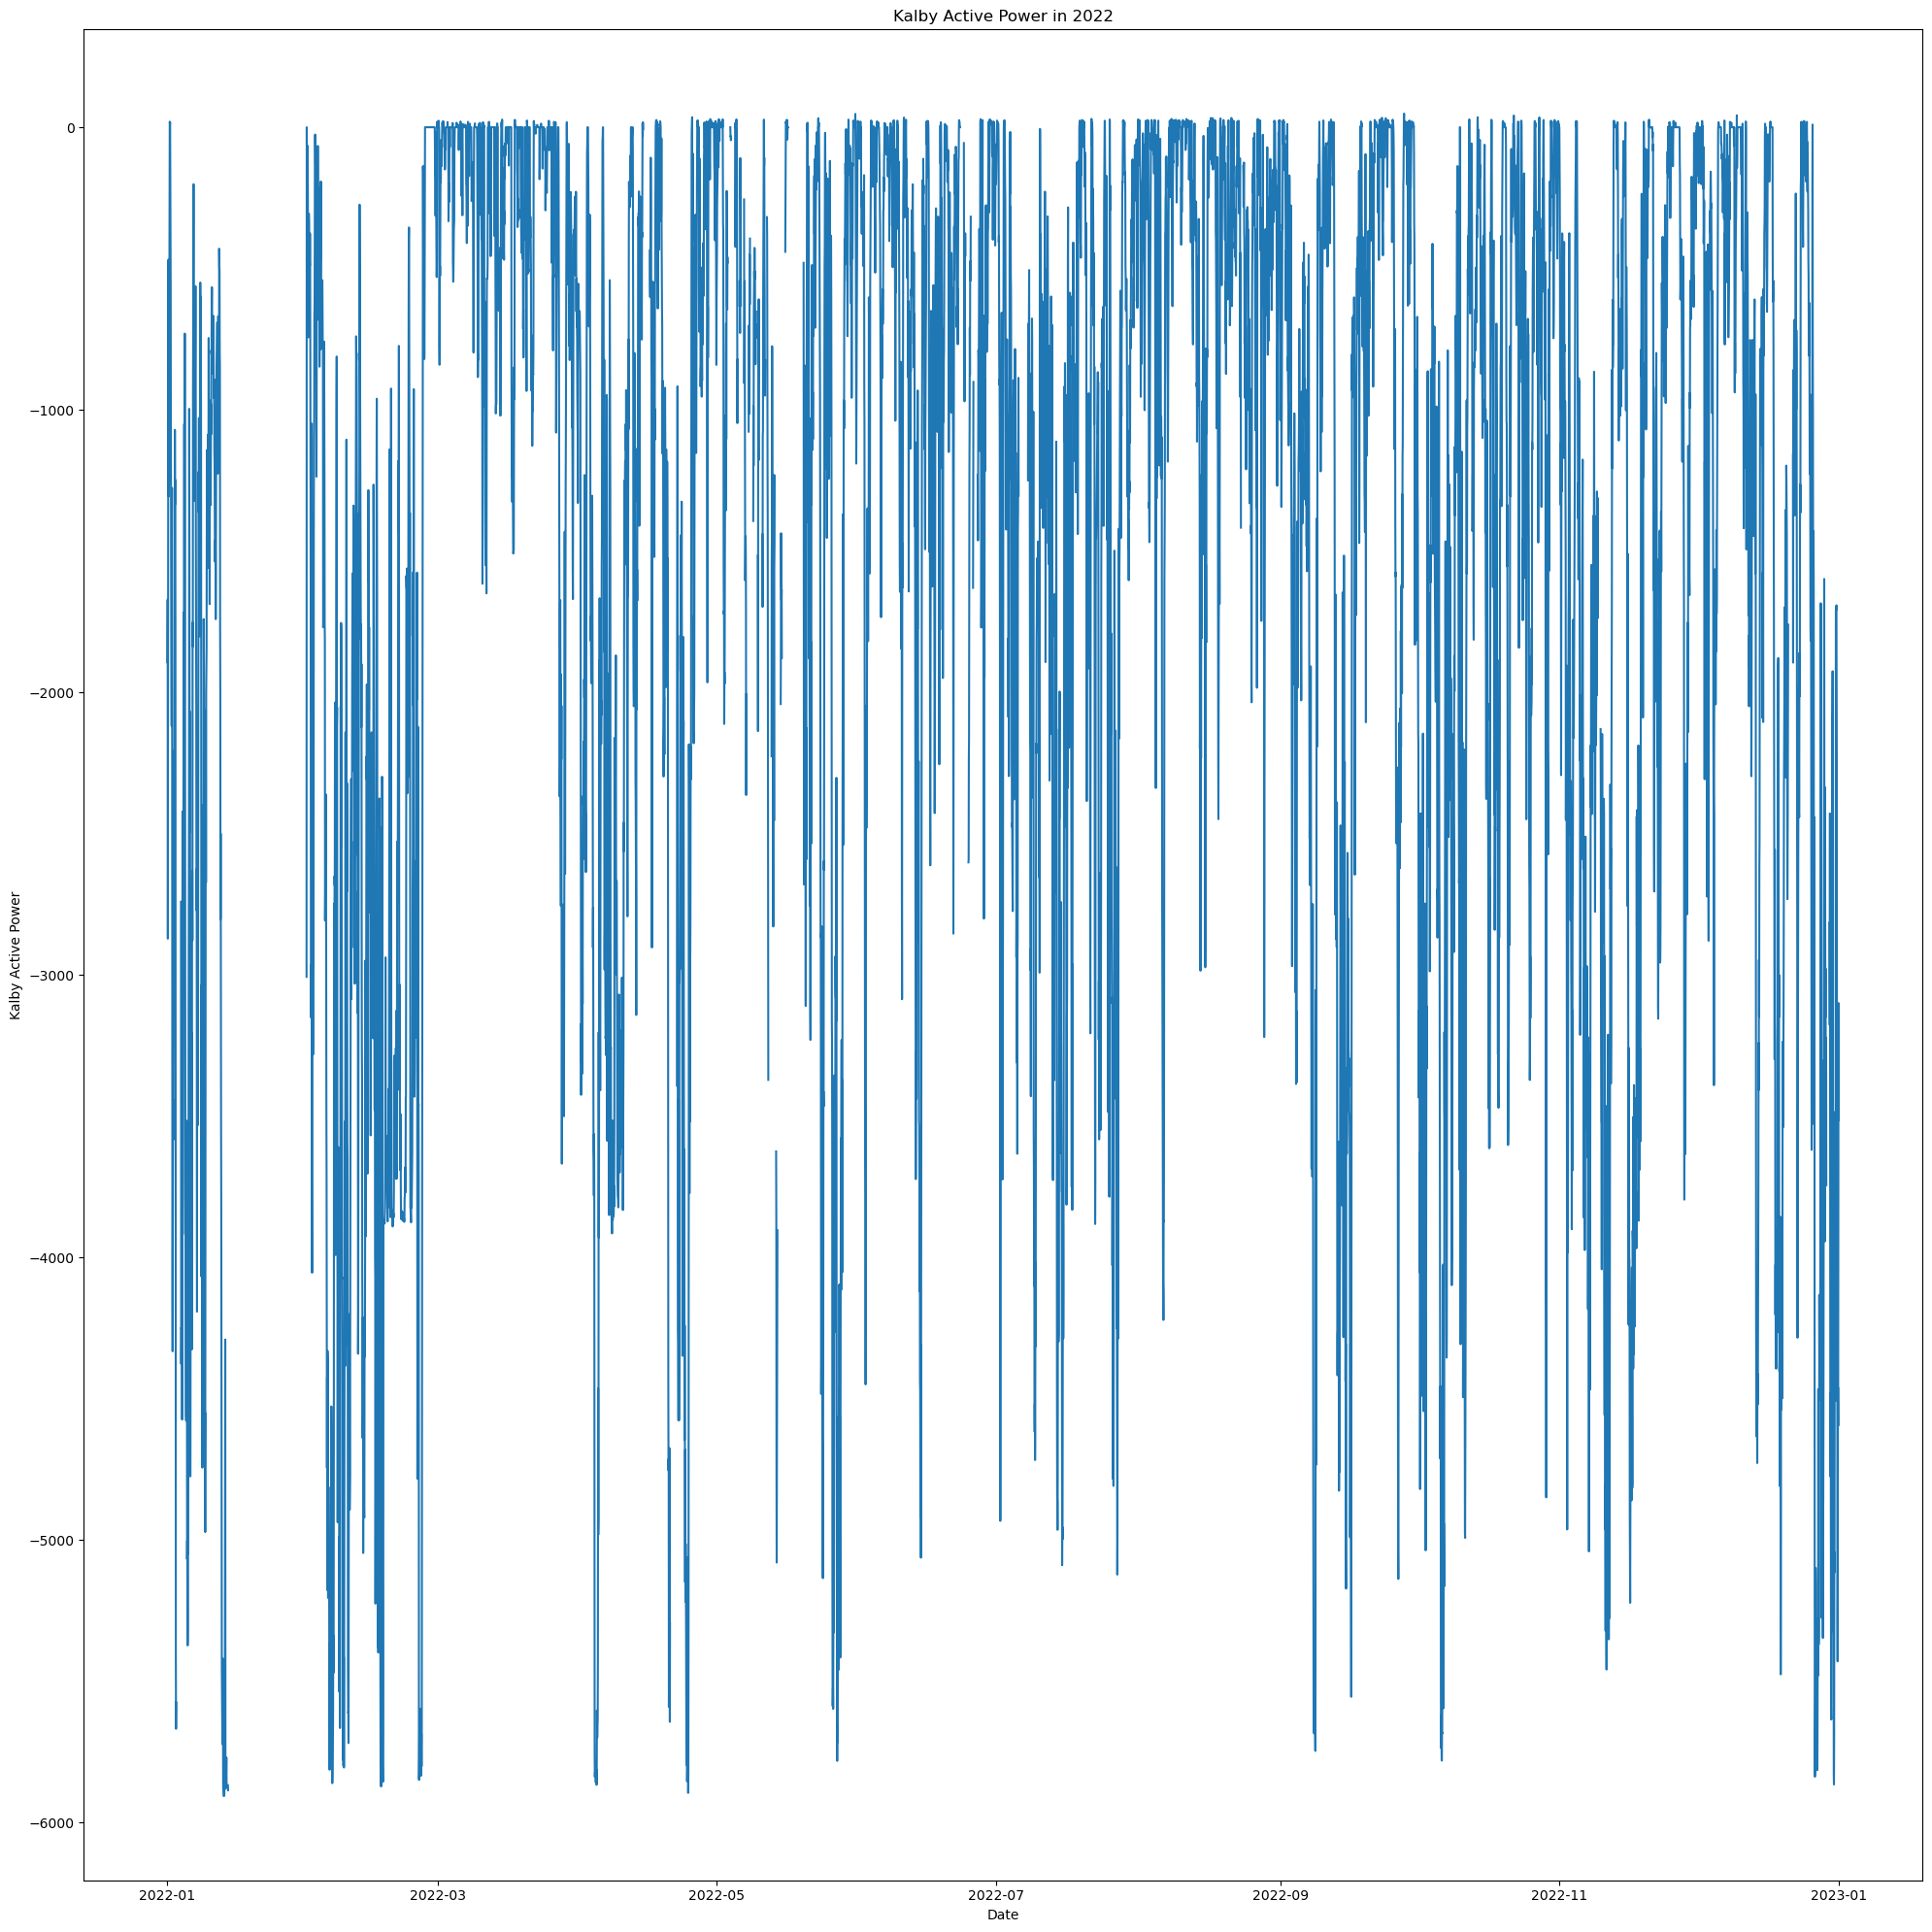

In [24]:
plt.figure(figsize=(20,20))
plt.plot(aggregated_Kalby.index, aggregated_Kalby['AKI Kalby Active Power'])
plt.xlabel('Date')
plt.ylabel('Kalby Active Power')
plt.title('Kalby Active Power in 2022')


# # Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [25]:
# Check the aggregated dataframe
aggregated_Kalby

,AKI Kalby Active Power
datetime,
2022-01-01 00:00:00,-1893.541825
2022-01-01 01:00:00,-1671.836030
2022-01-01 02:00:00,-2871.720706
2022-01-01 03:00:00,-1911.765229
2022-01-01 04:00:00,-881.754117
...,...
2022-12-31 19:00:00,-4459.956834
2022-12-31 20:00:00,-4595.766776
2022-12-31 21:00:00,-3607.702982


In [26]:
# Copy the dataframe to use it for visualization
kalby_graph = aggregated_Kalby.copy()
# Reset the datetime index to a normal column
kalby_graph.reset_index(inplace=True)
kalby_graph

,datetime,AKI Kalby Active Power
0,2022-01-01 00:00:00,-1893.541825
1,2022-01-01 01:00:00,-1671.836030
2,2022-01-01 02:00:00,-2871.720706
3,2022-01-01 03:00:00,-1911.765229
4,2022-01-01 04:00:00,-881.754117
...,...,...
8755,2022-12-31 19:00:00,-4459.956834
8756,2022-12-31 20:00:00,-4595.766776
8757,2022-12-31 21:00:00,-3607.702982
8758,2022-12-31 22:00:00,-3100.013804


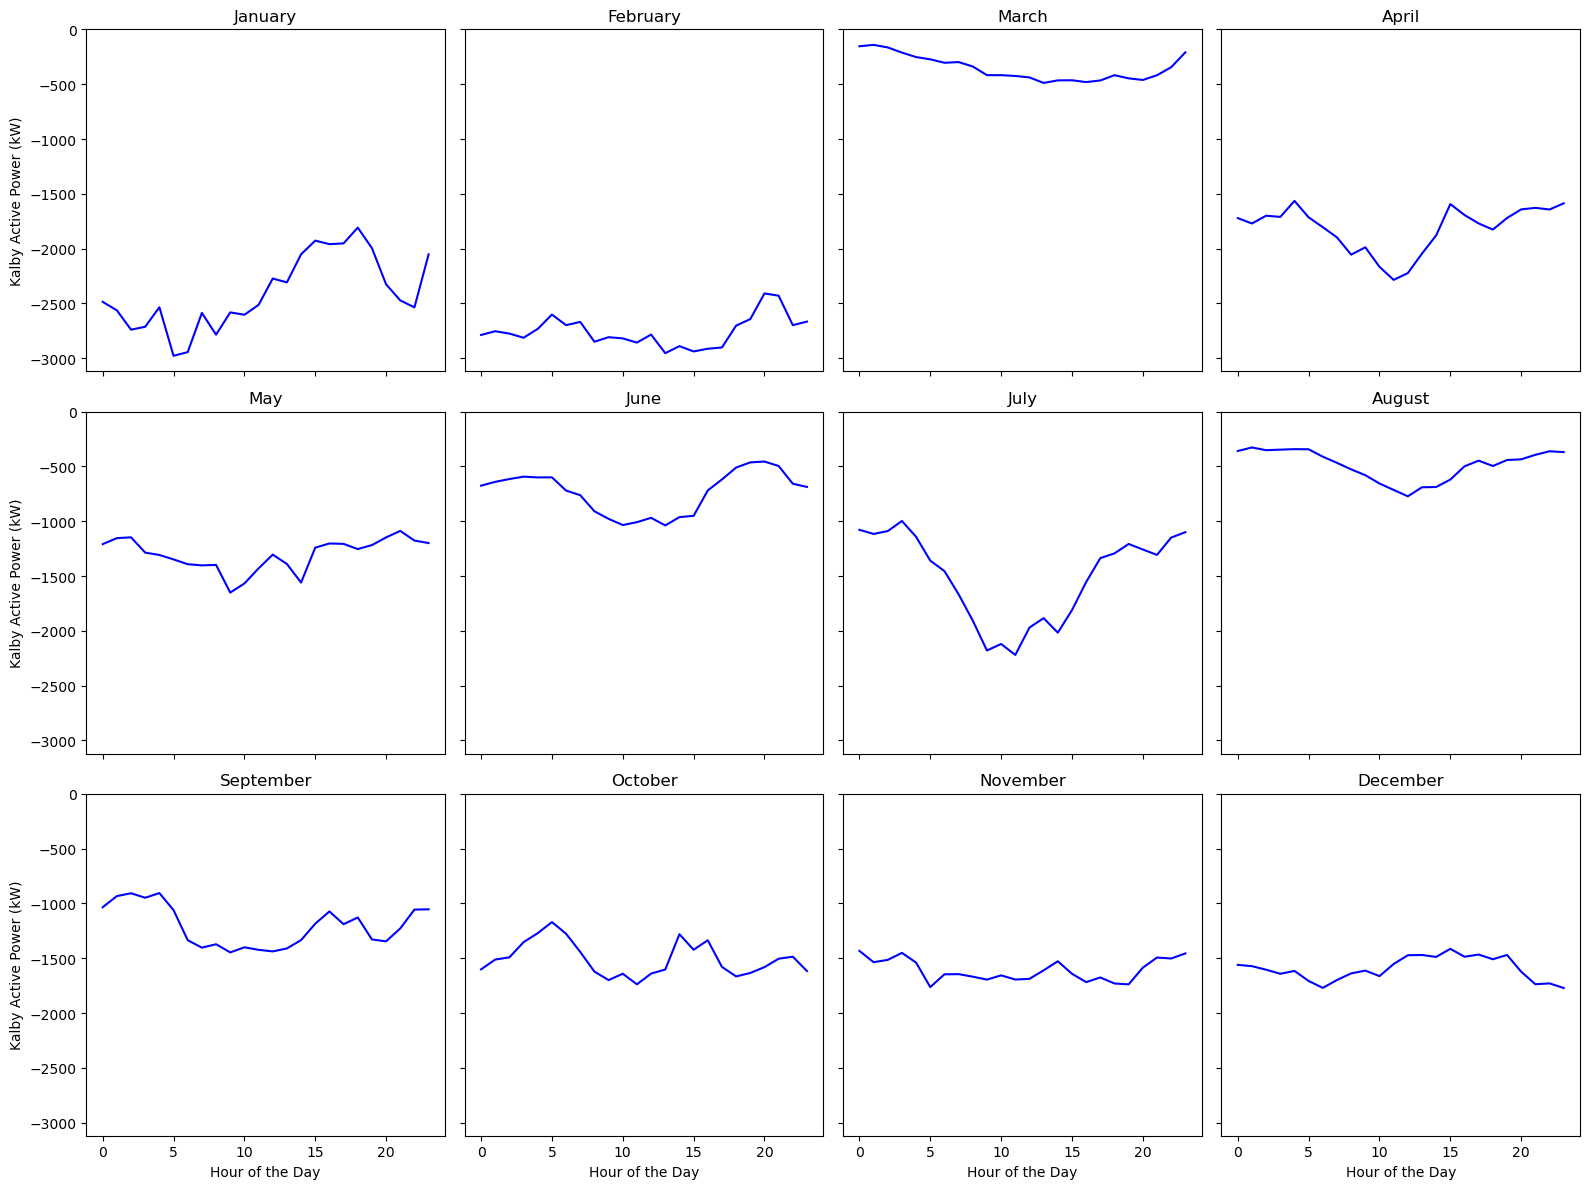

In [27]:
# Create a new column 'Month' in the kalby_graph DataFrame, extracting the full month name from the 'datetime' column using strftime.
kalby_graph['Month'] = kalby_graph['datetime'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to categorical with the correct order
kalby_graph['Month'] = pd.Categorical(kalby_graph['Month'], categories=month_order, ordered=True)
kalby_graph['Hour'] = kalby_graph['datetime'].dt.hour

# Group by month and hour to calculate the mean wind power for each combination
monthly_hourly_data = kalby_graph.groupby(['Month', 'Hour'])['AKI Kalby Active Power'].mean().reset_index()
unique_months = monthly_hourly_data['Month'].unique()

fig, axes = plt.subplots(3, 4, figsize=(16, 12), sharex=True, sharey=True)

# Flatten axes to easily loop through
axes = axes.flatten()

# Plot for each month in its respective subplot
for i, month in enumerate(unique_months):
    # Filter data for the current month
    monthly_data = monthly_hourly_data[monthly_hourly_data['Month'] == month]
    
    # Plot the line for the current month
    sns.lineplot(x='Hour', y='AKI Kalby Active Power', data=monthly_data, ax=axes[i], color='b')
    
    # Set the title for the subplot
    axes[i].set_title(month)
    
    # Set labels for only the bottom row and leftmost column
    if i % 4 == 0:
        axes[i].set_ylabel('Kalby Active Power (kW)')
    if i >= 8:
        axes[i].set_xlabel('Hour of the Day')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
# March has very low values, check if there are missing values
march=kalby_graph[kalby_graph['Month'].isin(['March'])]

In [29]:
march.isna().sum()

datetime                  0
AKI Kalby Active Power    0
Month                     0
Hour                      0
dtype: int64

In [31]:
aggregated_Kalby.to_csv('../Data assignment 1/Windpark data.csv', index=True)  